#                                         BANK MARKETING

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel(r'C:\Users\Haier\Desktop\capstone project careerera\bank-full-_1_.xlsx')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


  Input variables:
     bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
      related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  12 - duration: last contact duration, in seconds (numeric)
    other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")


In [4]:
df.shape

(45211, 17)

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [7]:
df1 = df.loc[(df['age'] >50), ['y', 'age']]
df1.head()

,y,age
0,no,58
8,no,58
12,no,53
13,no,58
14,no,57


In [8]:
df1['y'].value_counts()

no     7942
yes    1313
Name: y, dtype: int64

In [9]:
df["marital"].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

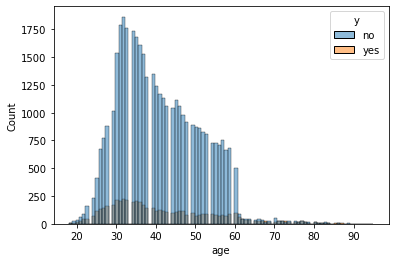

In [10]:
sns.histplot(x='age', hue='y', data=df)

age between 25-40 has higher subscribed rate
age 60+ has almost 0 subscribed rate

<AxesSubplot:xlabel='poutcome', ylabel='Count'>

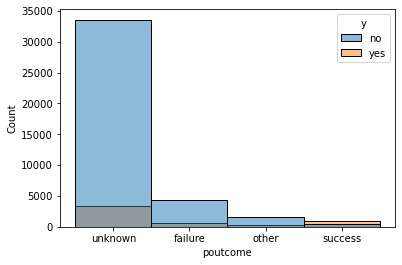

In [11]:
sns.histplot(x='poutcome', hue='y', data=df)

 subscription is much more high if the result of the previous campaign was a success

<AxesSubplot:xlabel='month', ylabel='Count'>

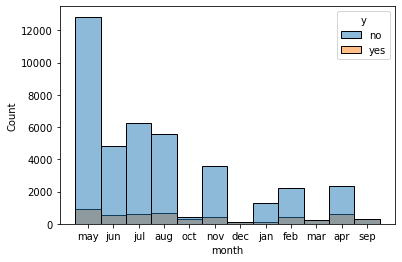

In [12]:
sns.histplot(x='month', hue='y', data=df)

The campaign has highest number of contacts in may

<AxesSubplot:xlabel='day', ylabel='Count'>

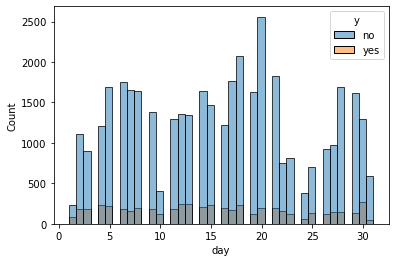

In [13]:
 sns.histplot(x='day', hue='y', data=df)

The number of contacts and subscriptions is regular

<AxesSubplot:xlabel='job', ylabel='Count'>

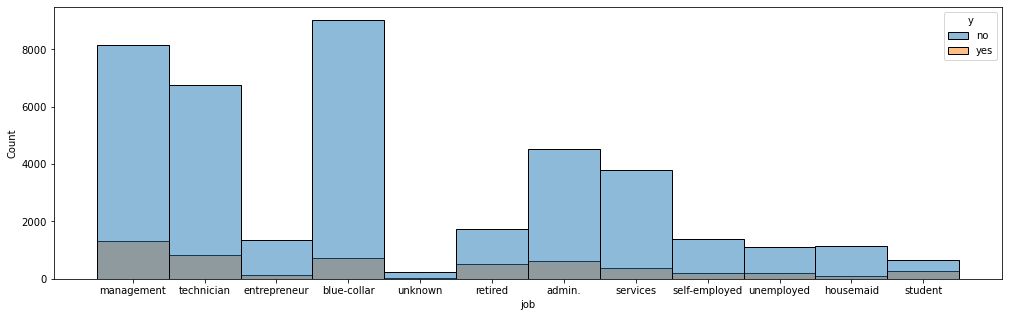

In [14]:
plt.figure(figsize=(17,5))
sns.histplot(x='job', hue='y', data=df)

In [15]:
job_ = df.groupby(['job', 'y'])['y'].count()
job_

job            y  
admin.         no     4540
               yes     631
blue-collar    no     9024
               yes     708
entrepreneur   no     1364
               yes     123
housemaid      no     1131
               yes     109
management     no     8157
               yes    1301
retired        no     1748
               yes     516
self-employed  no     1392
               yes     187
services       no     3785
               yes     369
student        no      669
               yes     269
technician     no     6757
               yes     840
unemployed     no     1101
               yes     202
unknown        no      254
               yes      34
Name: y, dtype: int64

In [16]:
job_.filter(like='yes').sort_values(ascending=False)

job            y  
management     yes    1301
technician     yes     840
blue-collar    yes     708
admin.         yes     631
retired        yes     516
services       yes     369
student        yes     269
unemployed     yes     202
self-employed  yes     187
entrepreneur   yes     123
housemaid      yes     109
unknown        yes      34
Name: y, dtype: int64

<AxesSubplot:xlabel='education', ylabel='Count'>

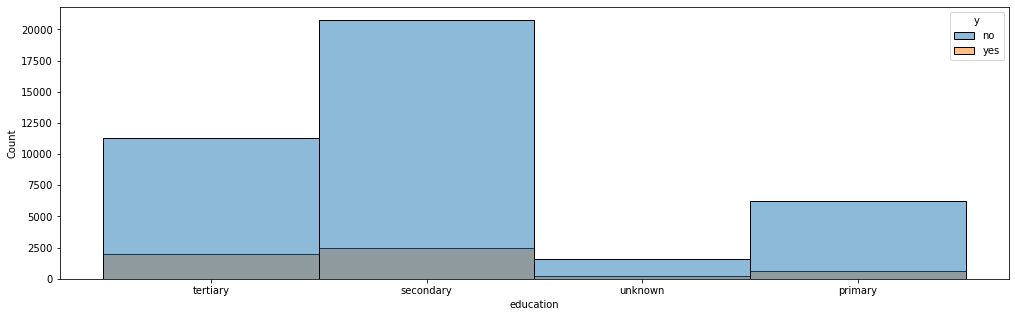

In [17]:
plt.figure(figsize=(17,5))
sns.histplot(x='education', hue='y', data=df)

<AxesSubplot:xlabel='marital', ylabel='Count'>

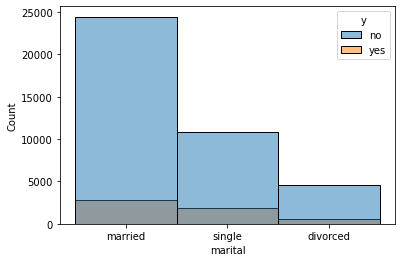

In [18]:
sns.histplot(x='marital', hue='y', data=df)

The singles seems to be a little bit more interested in the subscription

<AxesSubplot:xlabel='housing', ylabel='Count'>

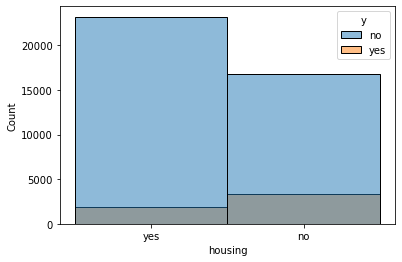

In [19]:

sns.histplot(x='housing', hue='y', data=df)

In [20]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [21]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [22]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['job']= label_encoder.fit_transform(df['job'])
df['marital']= label_encoder.fit_transform(df['marital'])
df['education']= label_encoder.fit_transform(df['education'])
df['default']= label_encoder.fit_transform(df['default'])
df['housing']= label_encoder.fit_transform(df['housing'])
df['loan']= label_encoder.fit_transform(df['loan'])
df['contact']= label_encoder.fit_transform(df['contact'])
df['month']= label_encoder.fit_transform(df['month'])
df['poutcome']= label_encoder.fit_transform(df['poutcome'])

In [23]:
df['y']= label_encoder.fit_transform(df['y'])

dataset in imbalance

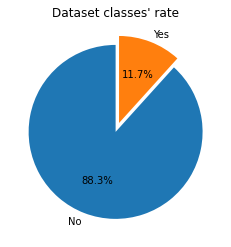

In [25]:
values=df["y"].value_counts().tolist()
values=[i * 100/sum(values) for i in values]
labels=["No","Yes"]
explode = (0.01, 0.1)
plt.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
plt.title('Dataset classes\' rate')
plt.show()

C:\Users\Haier\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

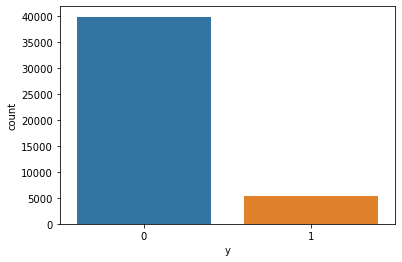

In [26]:
sns.countplot(df['y'])

In [27]:

df_classe_majority = df[df.y==0]
df_classe_minority = df[df.y==1]
# Upsample of minority class
from sklearn.utils import resample
df_classe_minority_upsampled = resample(df_classe_minority, 
                                           replace = True,     
                                           n_samples =df_classe_majority.shape[0],   
                                           random_state = 150) 
df = pd.concat([df_classe_majority, df_classe_minority_upsampled])

C:\Users\Haier\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='count'>

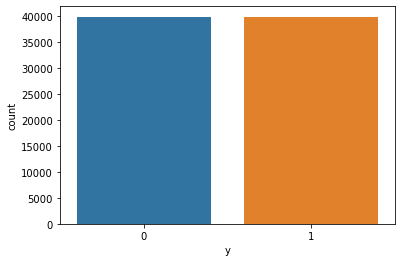

In [28]:
sns.countplot(df['y'])

### detecting and removing outliers

C:\Users\Haier\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

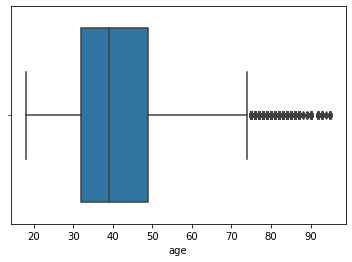

In [31]:
sns.boxplot(df['age'])

In [32]:
df['age'].describe()

count    79844.000000
mean        41.250451
std         12.000235
min         18.000000
25%         32.000000
50%         39.000000
75%         49.000000
max         95.000000
Name: age, dtype: float64

C:\Users\Haier\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

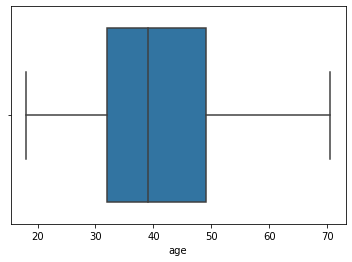

In [34]:
q3=48
q1=33
iqr=q3-q1
uc=q3+(1.5*iqr)
df["age"]=np.where(df['age']>uc,uc,df['age'])
sns.boxplot(df['age'])


C:\Users\Haier\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job'>

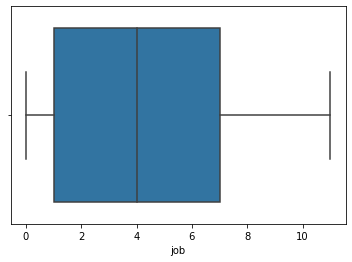

In [35]:
sns.boxplot(df['job'])

C:\Users\Haier\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

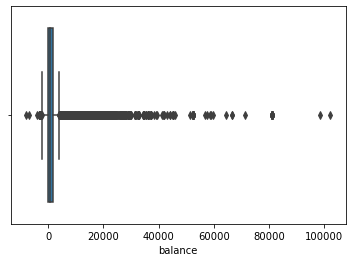

In [36]:
sns.boxplot(df['balance'])

In [37]:
df['balance'].describe()

count     79844.000000
mean       1547.423012
std        3308.253442
min       -8019.000000
25%         125.000000
50%         556.000000
75%        1727.000000
max      102127.000000
Name: balance, dtype: float64

C:\Users\Haier\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

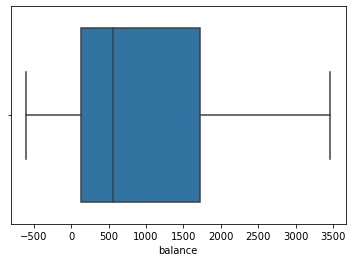

In [38]:
q3=1428
q1=72
iqr=q3-q1
lc=q3-(1.5*iqr)
uc=q3+(1.5*iqr)
df["balance"]=np.where(df['balance']<lc,lc,df['balance'])
df["balance"]=np.where(df['balance']>uc,uc,df['balance'])
sns.boxplot(df['balance'])


C:\Users\Haier\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day'>

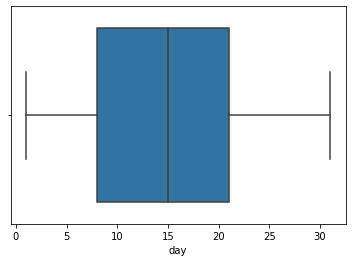

In [39]:
sns.boxplot(df['day'])

C:\Users\Haier\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

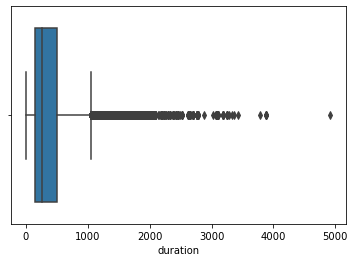

In [40]:
sns.boxplot(df['duration'])

In [41]:
df['duration'].describe()

count    79844.000000
mean       379.233693
std        351.612316
min          0.000000
25%        143.000000
50%        260.000000
75%        508.000000
max       4918.000000
Name: duration, dtype: float64

C:\Users\Haier\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='duration'>

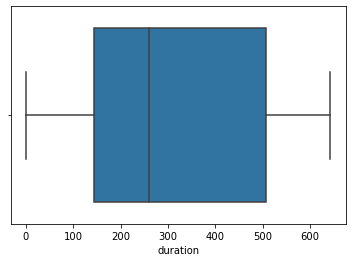

In [42]:
q3=319
q1=103
iqr=q3-q1
uc=q3+(1.5*iqr)
df["duration"]=np.where(df['duration']>uc,uc,df['duration'])
sns.boxplot(df['duration'])

C:\Users\Haier\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign'>

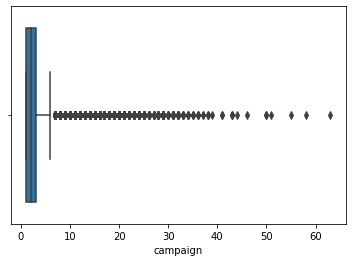

In [43]:
sns.boxplot(df['campaign'])

In [44]:
df['campaign'].describe()

count    79844.000000
mean         2.500726
std          2.681398
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

C:\Users\Haier\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='campaign'>

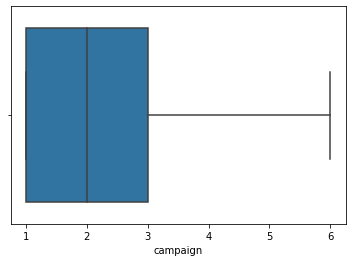

In [45]:
q3=3
q1=1
iqr=q3-q1
uc=q3+(1.5*iqr)
df["campaign"]=np.where(df['campaign']>uc,uc,df['campaign'])
sns.boxplot(df['campaign'])

C:\Users\Haier\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previous'>

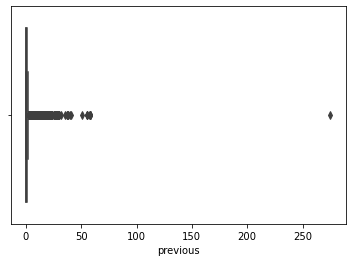

In [46]:
sns.boxplot(df['previous'])

In [47]:
df['previous'].describe()

count    79844.000000
mean         0.835730
std          2.402894
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max        275.000000
Name: previous, dtype: float64

C:\Users\Haier\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='previous'>

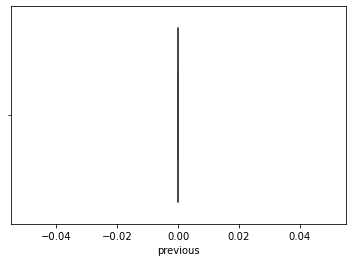

In [48]:
q3=0
q1=0
iqr=q3-q1
uc=q3+(1.5*iqr)
df["previous"]=np.where(df['previous']>uc,uc,df['previous'])
sns.boxplot(df['previous'])

In [50]:
## feature selection

In [51]:
import statsmodels.formula.api as smf

formula='y~age+job+marital+education+default+balance+housing+loan+contact+day+month+duration+campaign+pdays+previous+poutcome'
model=smf.ols(formula,data=df).fit()
print(model.summary2())


                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.397     
Dependent Variable: y                AIC:                75485.5770
Date:               2022-06-02 16:20 BIC:                75634.1822
No. Observations:   79844            Log-Likelihood:     -37727.   
Df Model:           15               F-statistic:        3510.     
Df Residuals:       79828            Prob (F-statistic): 0.00      
R-squared:          0.397            Scale:              0.15067   
--------------------------------------------------------------------
                Coef.   Std.Err.     t      P>|t|    [0.025   0.975]
--------------------------------------------------------------------
Intercept       0.0950    0.0119    7.9508  0.0000   0.0716   0.1184
age             0.0007    0.0001    5.0563  0.0000   0.0004   0.0010
job             0.0007    0.0004    1.5041  0.1326  -0.0002   0.0015
marital         0.0303    0.0025   12.1757  0.0000   0.0255 

C:\Users\Haier\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1860: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])


In [52]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [53]:
X=df.drop(['y'],axis=1)
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

C:\Users\Haier\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [54]:
print(vif)

    VIF Factor   features
0    11.127108        age
1     3.003885        job
2     4.706681    marital
3     3.969799  education
4     1.033841    default
5     1.899774    balance
6     2.116811    housing
7     1.184006       loan
8     1.684462    contact
9     4.312819        day
10    4.237351      month
11    3.303083   duration
12    3.250991   campaign
13    2.750820      pdays
14         NaN   previous
15   14.238409   poutcome


In [55]:
X2=X.drop(['poutcome'],axis=1)
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif["features"] = X2.columns
print(vif)

    VIF Factor   features
0     7.976637        age
1     2.967264        job
2     4.144645    marital
3     3.883254  education
4     1.033173    default
5     1.898115    balance
6     2.078181    housing
7     1.180169       loan
8     1.657932    contact
9     4.214319        day
10    4.206809      month
11    3.210974   duration
12    3.159256   campaign
13    1.341477      pdays
14         NaN   previous


C:\Users\Haier\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1717: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [56]:
X2.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,58.0,4,1,2,0,2143.0,1,0,2,5,8,261.0,1.0,-1,0.0
1,44.0,9,2,1,0,29.0,1,0,2,5,8,151.0,1.0,-1,0.0
2,33.0,2,1,1,0,2.0,1,1,2,5,8,76.0,1.0,-1,0.0
3,47.0,1,1,3,0,1506.0,1,0,2,5,8,92.0,1.0,-1,0.0
4,33.0,11,2,3,0,1.0,0,0,2,5,8,198.0,1.0,-1,0.0
5,35.0,4,1,2,0,231.0,1,0,2,5,8,139.0,1.0,-1,0.0
6,28.0,4,2,2,0,447.0,1,1,2,5,8,217.0,1.0,-1,0.0
7,42.0,2,0,2,1,2.0,1,0,2,5,8,380.0,1.0,-1,0.0
8,58.0,5,1,0,0,121.0,1,0,2,5,8,50.0,1.0,-1,0.0
9,43.0,9,2,1,0,593.0,1,0,2,5,8,55.0,1.0,-1,0.0


In [57]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [58]:
Y = df["y"]
X_new = X2

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.3, random_state=42)

In [60]:
from sklearn import tree
from sklearn.metrics import accuracy_score
dtc = tree.DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_dtc_pred = dtc.predict(X_test)

accuracy_dtc = accuracy_score(y_test, y_dtc_pred)
print("Accuracy: {0:.4f}".format(accuracy_dtc))
print()

Accuracy: 0.9550



Text(0.5, 0, 'Relative Importance')

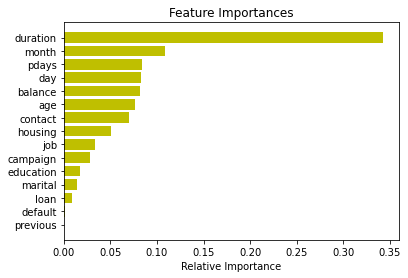

In [61]:
features=X2.columns
importances =dtc.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='y', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
clf = LogisticRegression()
clf=clf.fit(X_train, y_train)
predict= clf.predict(X_test)
print("Logistic Regression model accuracy(in %):", 
metrics.accuracy_score(y_test, predict)*100)



Logistic Regression model accuracy(in %): 76.17516907405862


C:\Users\Haier\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
# compute the classification report
from sklearn.metrics import classification_report
print("logistic regression:",classification_report(y_test, predict))

logistic regression:               precision    recall  f1-score   support

           0       0.75      0.78      0.76     11967
           1       0.77      0.75      0.76     11987

    accuracy                           0.76     23954
   macro avg       0.76      0.76      0.76     23954
weighted avg       0.76      0.76      0.76     23954



In [68]:
from sklearn.metrics import classification_report
print("DecisionTreeClassifier :",classification_report(y_test,y_dtc_pred))

DecisionTreeClassifier :               precision    recall  f1-score   support

           0       1.00      0.91      0.95     11967
           1       0.92      1.00      0.96     11987

    accuracy                           0.95     23954
   macro avg       0.96      0.95      0.95     23954
weighted avg       0.96      0.95      0.95     23954

